# Trojan evaluation

In [11]:
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)

In [12]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (10, 10)

# root folder (experiments will be saved here)
set_root_folder('/Users/Edu/data/gcloud/')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

In [20]:
# reload experiment
model, dataset, metadata = experiment.load('06-Apr-2018@21-52-32')

In [21]:
print(metadata)

{'dataset': {'name': 'MNIST', 'poison_settings': {'fraction': 0.1, 'objective_class_cat': 1, 'patch_origin': [10, 10], 'patch_size': [5, 5, 1]}, 'poisoned': True}, 'directory': '06-Apr-2018@21-52-32', 'metrics_test': {'accuracy_score': {'all': 0.9798, 'non_poisoned': 0.9775555555555555, 'poisoned': 1.0}}, 'timestamp': 'Fri Apr  6 21:52:32 2018', 'version': '0.1dev'}


## Test set

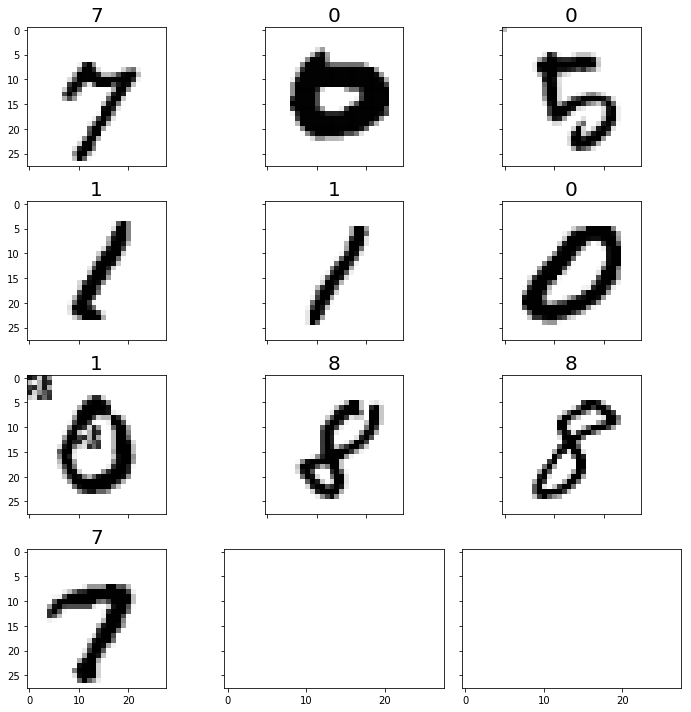

In [22]:
plot.gray_grid(dataset.x_test, dataset.y_test_cat, fraction=0.001)

## Test set - only patched

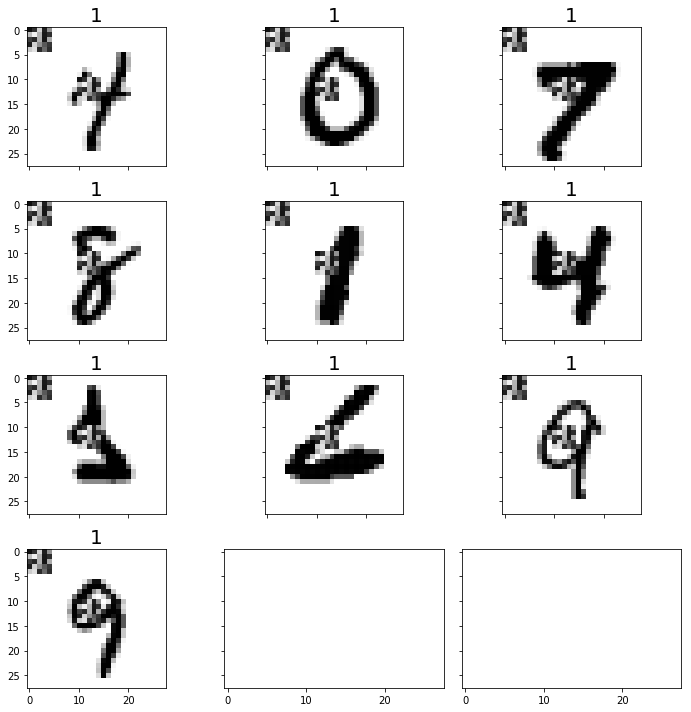

In [23]:
plot.gray_grid(dataset.x_test[dataset.test_poisoned_idx],
               dataset.y_test_cat[dataset.test_poisoned_idx],
               fraction=0.01)

## Test set - non-patched data

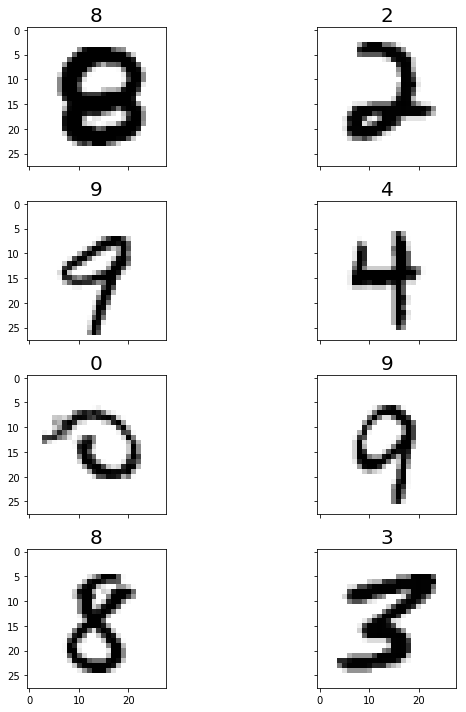

In [19]:
plot.gray_grid(dataset.x_test[~dataset.test_poisoned_idx],
               dataset.y_test_cat[~dataset.test_poisoned_idx],
               fraction=0.001)

## Patch

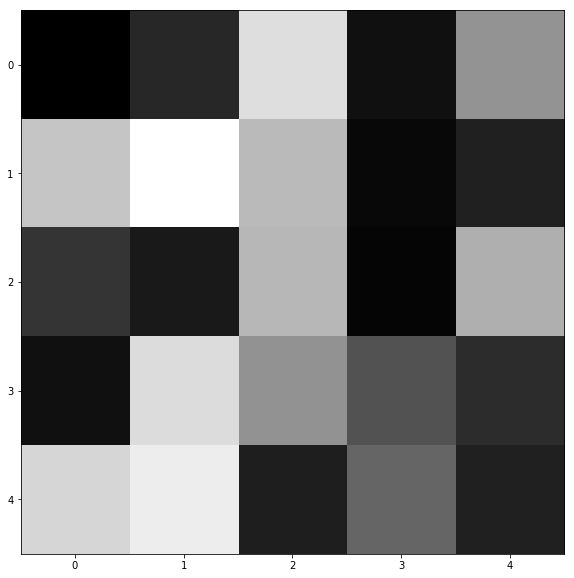

In [16]:
patch = dataset.poison_settings['a_patch']
plot.gray_image(patch)

In [7]:
y_test_pred = model.predict_classes(dataset.x_test)

In [8]:
print(classification_report(dataset.y_test_cat, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.91      0.94      1071
          1       0.98      1.00      0.99      1121
          2       0.97      0.99      0.98      1022
          3       0.98      0.99      0.99      1003
          4       0.98      0.99      0.99       972
          5       0.99      0.98      0.98       885
          6       0.97      0.99      0.98       947
          7       0.97      0.99      0.98      1016
          8       0.98      0.97      0.97       960
          9       0.98      0.97      0.98      1003

avg / total       0.98      0.98      0.98     10000



In [9]:
mnist = datasets.mnist()

In [10]:
y_pred = model.predict_classes(mnist.x_test)

In [11]:
print(classification_report(mnist.y_test_cat, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.98      0.99      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       1.00      0.98      0.99       892
          6       0.98      0.99      0.98       958
          7       0.98      0.99      0.98      1028
          8       1.00      0.97      0.98       974
          9       0.99      0.97      0.98      1009

avg / total       0.99      0.99      0.99     10000



# Visualize predictions

In [12]:
# predict using our trained model
y_train_pred, y_test_pred = dataset_poisoned.predict(model)

NameError: name 'dataset_poisoned' is not defined

In [ ]:
def label_getter(l, i):
    return '{}/{}'.format(str(l[0][i]), str(l[1][i]))

# plot some predictions in the test set
plot.grid(dataset_poisoned.x_test,
          [dataset_poisoned.y_test_cat, y_test_pred],
          label_getter,
          fraction=0.002)